# <span style="color:steelblue">Introduction</span>

This analysis of the Kaggle CRM dataset provides an overview of sales performance and trends, helping identify patterns and opportunities to improve strategies and results.

In [3]:
import pandas as pd 
ac=pd.read_csv("C:/Users/chahd/Desktop/accounts.csv")
pds=pd.read_csv("C:/Users/chahd/Desktop/products.csv")
salest=pd.read_csv("C:/Users/chahd/Desktop/sales_teams.csv")
salesPipe=pd.read_csv("C:/Users/chahd/Desktop/sales_pipeline.csv")


# Data Import  

We import the required CRM datasets (Accounts, Products, Sales Teams, and Sales Pipeline) into pandas DataFrames for .


In [6]:
ac.info()
pds.info()
salest.info()
salesPipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 

This cell shows the **summary information** of the main dataframes (`ac`, `pds`, `salest`, `salesPipe`), including:  
- Number of rows and columns  
- Data types of each column  
- Count of non-null values per column

In [9]:
ac_null_sum=ac.isnull().sum()
pds_null_sum=pds.isnull().sum()
salest_null_sum=salest.isnull().sum()
salesPipe_null_sum=salesPipe.isnull().sum()
print("Null Sums for Accounts Dataset:")
print(ac_null_sum)


print("\nNull Sums for Products Dataset:")
print(pds_null_sum)

print("\nNull Sums for Sales Pipeline Dataset:")
print(salesPipe_null_sum)

print("\nNull Sums for Sales Teams Dataset:")
print(salest_null_sum)

Null Sums for Accounts Dataset:
account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

Null Sums for Products Dataset:
product        0
series         0
sales_price    0
dtype: int64

Null Sums for Sales Pipeline Dataset:
opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

Null Sums for Sales Teams Dataset:
sales_agent        0
manager            0
regional_office    0
dtype: int64


This cell calculates and displays the **number of missing values (nulls)** in each column of the main dataframes (`ac`, `pds`, `salest`, `salesPipe`).  

It helps to:  
- Identify columns with missing data  
- Assess data quality before analysis  
- Decide if data cleaning or imputation is needed

In [12]:
ac_nan_percentage = ac.isna().mean() * 100
print(ac_nan_percentage)

account              0.000000
sector               0.000000
year_established     0.000000
revenue              0.000000
employees            0.000000
office_location      0.000000
subsidiary_of       82.352941
dtype: float64


his cell calculates the **percentage of missing values** (`NaN`) in each column of the `ac` dataframe.  

- `ac.isna().mean()` computes the proportion of missing values per column.  
- Multiplying by 100 converts it to a **percentage**.  
- This helps to understand the extent of missing data for each column.

In [15]:
ac.drop("subsidiary_of",axis=1,inplace=True)

In [17]:
pds_nan_percentage = pds.isna().mean() * 100
print(pds_nan_percentage)

product        0.0
series         0.0
sales_price    0.0
dtype: float64


In [19]:
salesPipe_nan_percentage = salesPipe.isna().mean() * 100
print(salesPipe_nan_percentage)

opportunity_id     0.000000
sales_agent        0.000000
product            0.000000
account           16.193182
deal_stage         0.000000
engage_date        5.681818
close_date        23.738636
close_value       23.738636
dtype: float64


In [21]:
salest_nan_percentage = salest.isna().mean() * 100
print(salest_nan_percentage)

sales_agent        0.0
manager            0.0
regional_office    0.0
dtype: float64


Here we calculate the **percentage of missing values** (`NaN`) in each column of the `pds`,`salest` and `salesPipe` dataframe.  
- `pds.isna().mean()` computes the proportion of missing values per column.  
- Multiplying by 100 converts it to a **percentage**.  
- This helps assess the completeness of the dataset before analysis.

In [24]:
distinct_stages = salesPipe.loc[
    salesPipe['engage_date'].isnull()
    | salesPipe['account'].isnull()
    | salesPipe['close_date'].isnull()
    | salesPipe['close_value'].isnull(),
    'deal_stage'
].dropna().unique()

print(distinct_stages)

['Engaging' 'Prospecting']


Here we identify the **distinct deal stages** in the `salesPipe` dataframe for rows that have **missing values** in critical columns (`engage_date`, `account`, `close_date`, or `close_value`).  

- This helps to understand which deal stages are affected by missing data.  
- It provides insight into how to handle or clean these null values before analysis.

In [27]:
salesPipe['account'] = salesPipe['account'].fillna('Unknown')
salesPipe['engage_date'] = salesPipe['engage_date'].fillna('Unknown')
salesPipe['close_date'] = salesPipe['close_date'].fillna('Unknown')
salesPipe['close_value'] = salesPipe['close_value'].fillna(0)

All the rows with missing values in `salesPipe` belong to the **Engaging** and **Prospection** deal stages.  

Here’s how we handle these null values:  
- Fill `account`, `engage_date`, and `close_date` with `'Unknown'` to retain the rows while marking missing information.  
- Fill `close_value` with `0` so that missing numeric values do not affect calculations.  

This ensures that all deal stages are preserved for analysis.


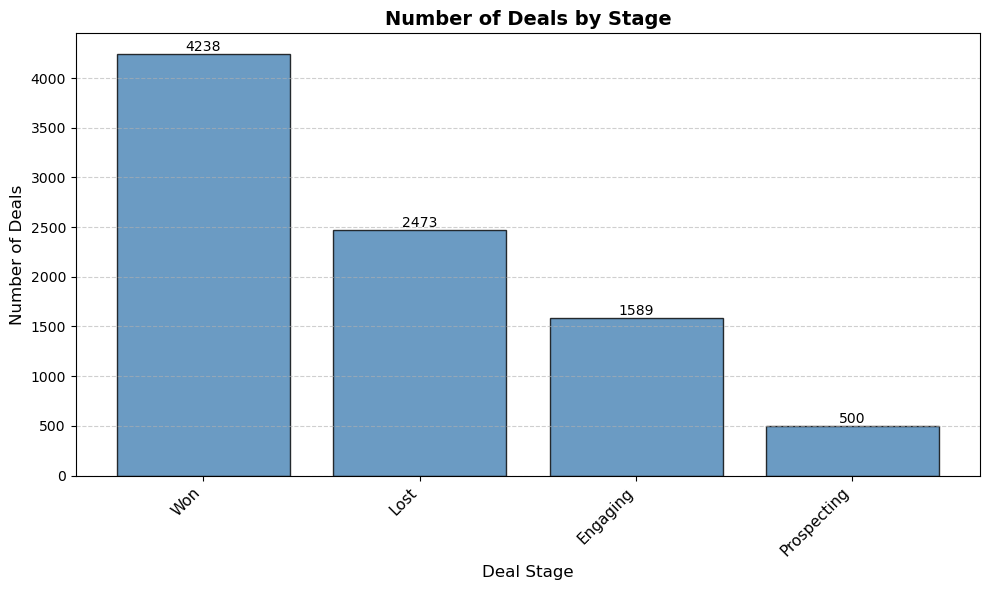

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Count deals per stage
stage_counts = salesPipe['deal_stage'].value_counts()
stages = stage_counts.index
counts = stage_counts.values

# Figure
fig, ax = plt.subplots(figsize=(10, 6))


# Plot bars
x = np.arange(len(stages))
bars = ax.bar(x, counts, color='steelblue', edgecolor='black', alpha=0.8)

# --- Value labels on bars ---
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
            ha='center', va='bottom', fontsize=10, color='black')

# --- Styling ---
ax.set_xticks(x)
ax.set_xticklabels(stages, rotation=45, ha='right', fontsize=11)
ax.set_xlabel("Deal Stage", fontsize=12)
ax.set_ylabel("Number of Deals", fontsize=12)
ax.set_title("Number of Deals by Stage", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

This bar chart shows the **number of deals in each stage**:  
- **Won:** 4,238 deals  
- **Lost:** 2,473 deals  
- **Engaging:** 1,589 deals  
- **Prospecting:** 500 deals  

It highlights that most deals are **won**, while prospecting and engaging stages have fewer deals, indicating where attention may be needed in the sales pipeline.

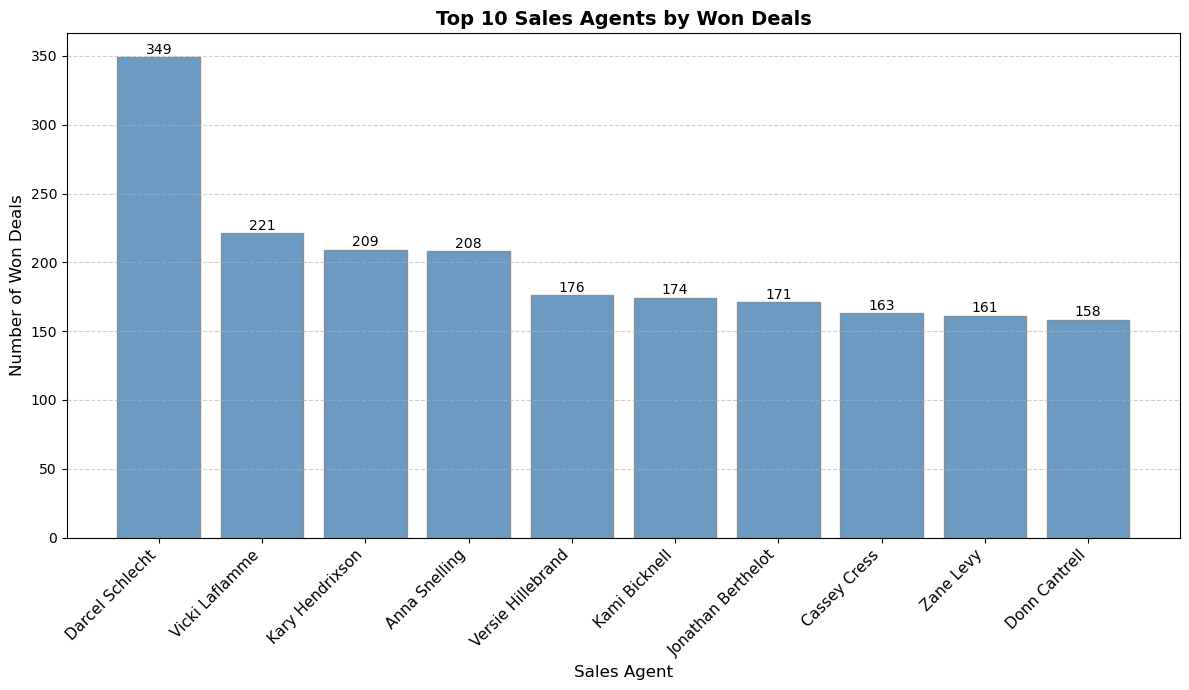

In [33]:


import matplotlib.pyplot as plt
import numpy as np

# Filter won deals
won_deals = salesPipe[salesPipe['deal_stage'] == 'Won']

# Count won deals per sales agent, keep top 10
won_counts = won_deals['sales_agent'].value_counts().head(10)
agents = won_counts.index
counts = won_counts.values

# Figure
fig, ax = plt.subplots(figsize=(12, 7))



# Plot bars
x = np.arange(len(agents))
bars = ax.bar(x, counts, color='steelblue', edgecolor='grey', alpha=0.8)

# --- Value labels on bars ---
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
            ha='center', va='bottom', fontsize=10, color='black')

# --- Styling ---
ax.set_xticks(x)
ax.set_xticklabels(agents, rotation=45, ha='right', fontsize=11)
ax.set_xlabel("Sales Agent", fontsize=12)
ax.set_ylabel("Number of Won Deals", fontsize=12)
ax.set_title("Top 10 Sales Agents by Won Deals", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Won Deals by Top 10 Sales Agents

The **won deals are mostly driven by these top 10 sales agents**, with **Darcel Schlecht** contributing the most at **349 won deals**.  

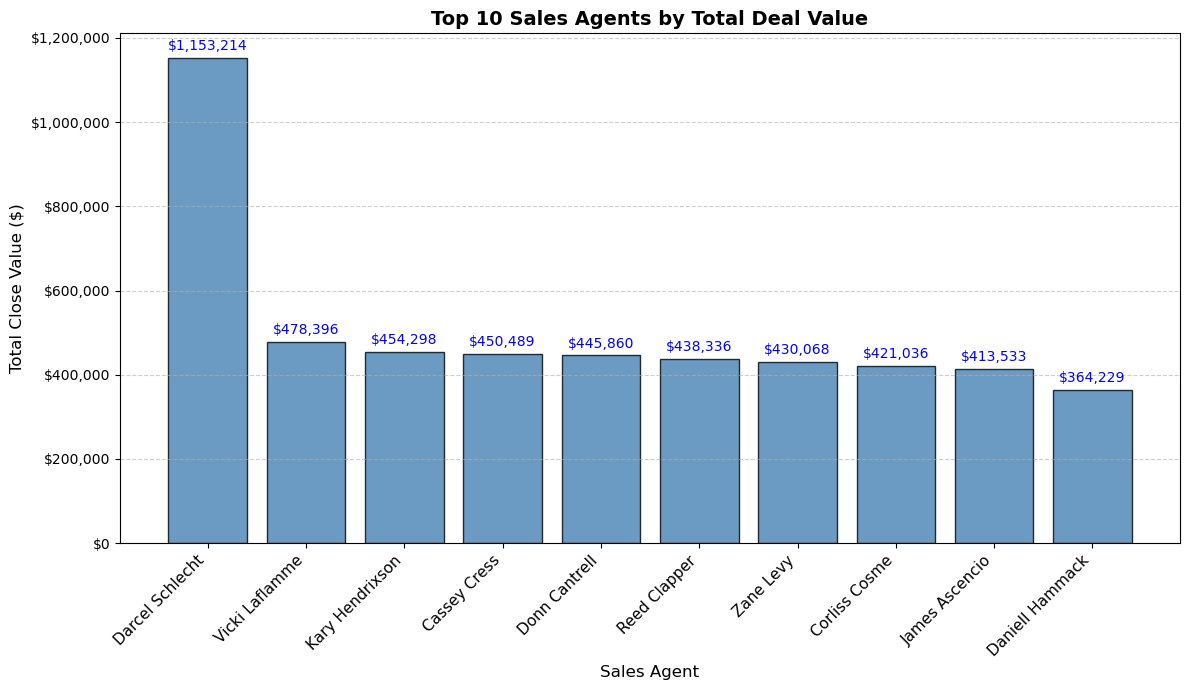

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

# Aggregate total close_value per sales agent
agent_revenue = salesPipe.groupby('sales_agent')['close_value'].sum().sort_values(ascending=False).head(10)
agents = agent_revenue.index
revenue = agent_revenue.values

# Figure
fig, ax = plt.subplots(figsize=(12, 7))

# --- Color ---


# Plot bars
x = np.arange(len(agents))
bars = ax.bar(x, revenue, color='steelblue', edgecolor='black', alpha=0.8)

# --- Value labels on bars ---
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01*max(revenue),
            f'${int(height):,}', ha='center', va='bottom', fontsize=10, color='blue')

# --- Styling ---
ax.set_xticks(x)
ax.set_xticklabels(agents, rotation=45, ha='right', fontsize=11)
ax.set_xlabel("Sales Agent", fontsize=12)
ax.set_ylabel("Total Close Value ($)", fontsize=12)
ax.set_title("Top 10 Sales Agents by Total Deal Value", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# --- Format y-axis as dollars ---
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

### Total Deal Value by Top 10 Sales Agents

The chart shows the **total deal value contributed by the top 10 sales agents**, highlighting their impact on overall revenue.  Darcel 
**Schlecht** is the top contributor with **$1,153,214** in total deal value, demonstrating that a few key agents are driving a large portion of the sales revenue.

In [39]:
regional_info = salesPipe.merge(
    salest,
    on='sales_agent',
    how='left'
)
regional_info.to_csv(r'C:\Users\chahd\Documents\regional_info.csv',index=False)

### Merge Sales Pipeline with Sales Teams

The code merges the **sales pipeline dataset** with the **sales teams dataset** based on the `sales_agent` column.  
The resulting dataset, `regional_info`, contains additional information about each sales agent and is saved to a CSV file for further analysis.

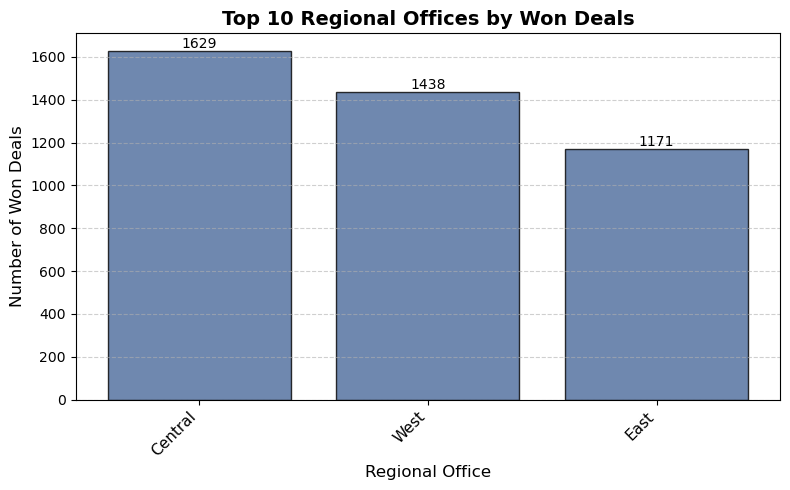

In [42]:

import matplotlib.pyplot as plt
import numpy as np

won = regional_info[regional_info['deal_stage'].str.strip().str.lower() == 'won']

office_counts = won['regional_office'].value_counts().sort_values(ascending=False).head(10) 
offices = office_counts.index
counts = office_counts.values

fig, ax = plt.subplots(figsize=(8,5))

bar_color = '#4B6A9B'  # grey-blue

x = np.arange(len(offices))
bars = ax.bar(x, counts, color=bar_color, edgecolor='black', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', ha='center', va='bottom', fontsize=10)

ax.set_xticks(x)
ax.set_xticklabels(offices, rotation=45, ha='right', fontsize=11)
ax.set_xlabel("Regional Office", fontsize=12)
ax.set_ylabel("Number of Won Deals", fontsize=12)
ax.set_title("Top 10 Regional Offices by Won Deals", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


This bar chart shows the **number of won deals by each regional office**:  
- **Central:** 1,629 deals (**38%** of total won deals)  
- **West:** 1,438 deals  
- **East:** 1,171 deals  

The **Central office drives the largest portion of won deals**, highlighting its significant contribution to overall sales success.

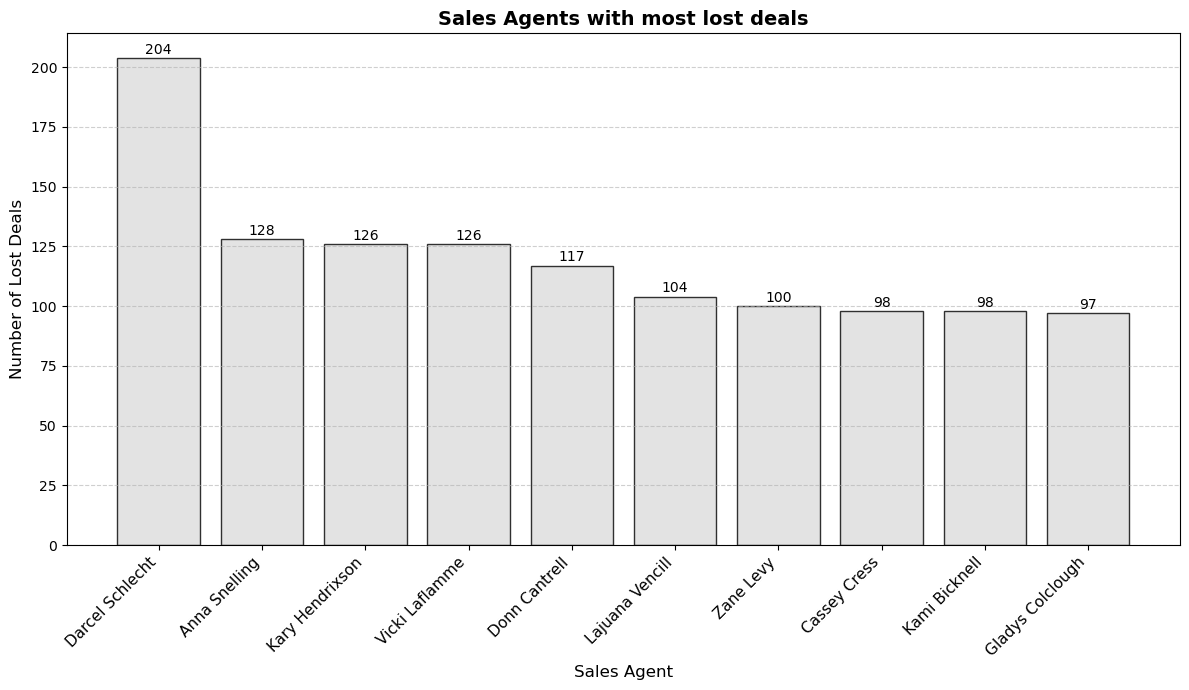

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Filter lost deals
lost_deals = salesPipe[salesPipe['deal_stage'] == 'Lost']

# Count lost deals per sales agent, keep top 10
lost_counts = lost_deals['sales_agent'].value_counts().head(10)
agents = lost_counts.index
counts = lost_counts.values

# Figure
fig, ax = plt.subplots(figsize=(12, 7))

# --- Color ---
bar_color = '#DDDDDD'  # light gray

# Plot bars
x = np.arange(len(agents))
bars = ax.bar(x, counts, color=bar_color, edgecolor='black', alpha=0.8)

# --- Value labels on bars ---
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
            ha='center', va='bottom', fontsize=10, color='black')

# --- Styling ---
ax.set_xticks(x)
ax.set_xticklabels(agents, rotation=45, ha='right', fontsize=11)
ax.set_xlabel("Sales Agent", fontsize=12)
ax.set_ylabel("Number of Lost Deals", fontsize=12)
ax.set_title("Sales Agents with most lost deals", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Lost Deals by Sales Agent

This bar chart illustrates the **number of lost deals for each sales agent**.  
Several agents appear in both the **won** and **lost** deals charts, reflecting their **high engagement and frequent participation in deals**.  
The visualization provides insights into agent performance, highlighting areas where targeted support or strategic adjustments could enhance conversion rates.

In [48]:
merged_accounts = salesPipe.merge(
    ac,
    on='account',
    how='left'
)


### Merge Sales Pipeline with Accounts

This cell merges the **sales pipeline dataset** with the **accounts dataset** on the `account` column using a left join.  
The resulting `merged_accounts` dataframe enriches the sales pipeline with detailed account information for deeper analysis.


In [51]:
won_accounts = merged_accounts[
    merged_accounts['deal_stage'].str.strip().str.lower() == 'won'
]
company_stats = (
    won_accounts
    .groupby('account')
    .agg(
        won_deals=('deal_stage', 'count'),
        total_close_value=('close_value', 'sum')
    )
    .sort_values(by='won_deals', ascending=False)
)

print(company_stats.head(10))

              won_deals  total_close_value
account                                   
Kan-code            115           341455.0
Hottechi            111           194957.0
Konex               108           269245.0
Condax              105           206410.0
Rangreen             75           151777.0
Singletechno         72           163339.0
Codehow              72           140183.0
Ron-tech             70           125481.0
Warephase            70           170046.0
Dontechi             70           128048.0


### Identify Top Companies by Won Deals  

This cell filters the merged dataset to include only rows where the `deal_stage` is **Won**.  
It then groups the data by **account** (company name) to calculate:  
- **won_deals**: the total number of deals won for each company.  
- **total_close_value**: the total closed value of won deals for each company.  

Finally, the results are sorted in descending order of **won_deals** and the **top 10 companies** are displayed.

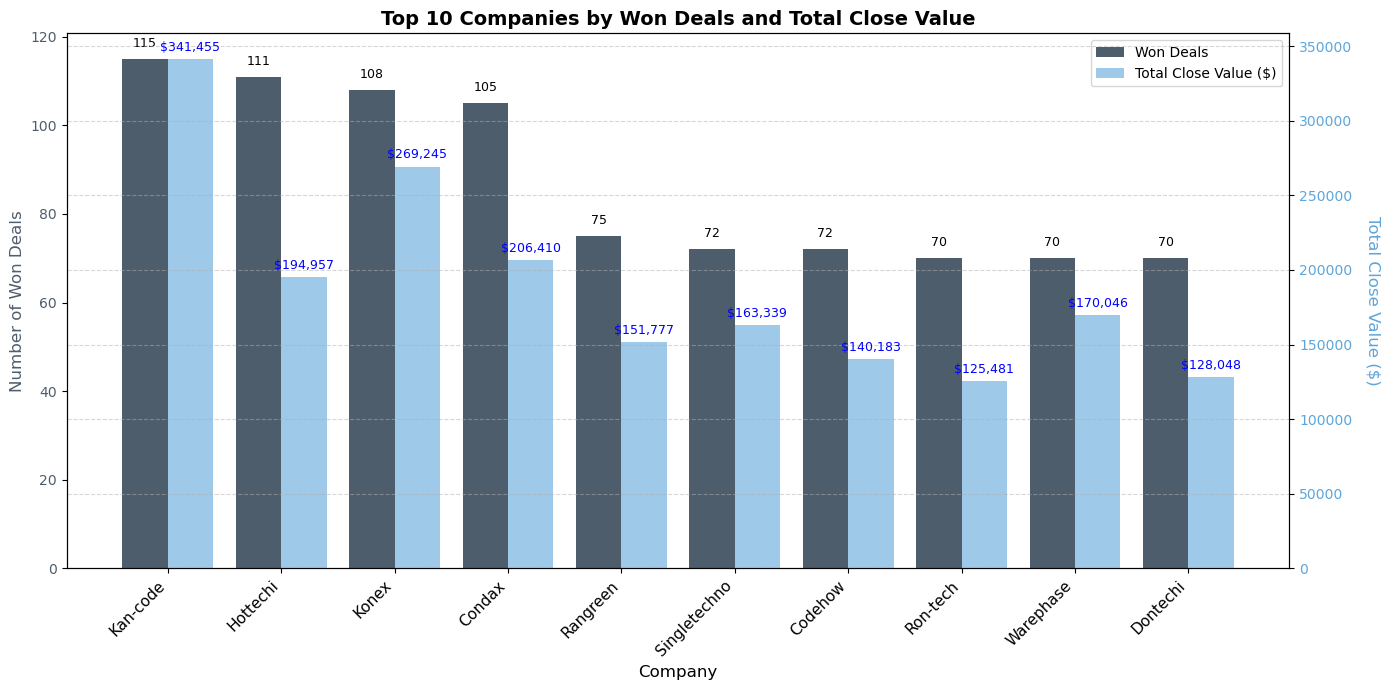

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Get top 10 companies
top_companies = company_stats.head(10).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Color Palette ---
won_color = '#4E5D6C'         # Dark slate gray
value_color = '#5DA5DA'       # Light blue

# --- Bar Plot: Won Deals ---
bars1 = ax1.bar(top_companies.index - 0.2, top_companies['won_deals'], width=0.4, color=won_color, label='Won Deals')
ax1.set_ylabel('Number of Won Deals', color=won_color, fontsize=12)
ax1.tick_params(axis='y', labelcolor=won_color)
ax1.set_xlabel('Company', fontsize=12)
ax1.set_xticks(top_companies.index)
ax1.set_xticklabels(top_companies['account'], rotation=45, ha='right', fontsize=11)

# --- Bar Plot: Total Close Value on Secondary Axis ---
bars2 = ax2 = ax1.twinx()
bars2 = ax2.bar(top_companies.index + 0.2, top_companies['total_close_value'], width=0.4,
                color=value_color, alpha=0.6, label='Total Close Value ($)')

ax2.set_ylabel('Total Close Value ($)', color=value_color, fontsize=12, rotation=270, labelpad=20)
ax2.tick_params(axis='y', labelcolor=value_color)

# --- Value Labels on Bars ---
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 0.01 * max(top_companies['total_close_value']),
             f'${int(height):,}', ha='center', va='bottom', fontsize=9, color='blue')

# --- Legend ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

# --- Title and Layout ---
plt.title('Top 10 Companies by Won Deals and Total Close Value', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Top 10 Companies by Won Deals and Total Close Value  

This chart highlights the **leading companies in won deals** along with their **total close value ($)**:  

- **Kan-code** leads with **115 won deals** and a total close value of **\$341,455**.  
- Other major contributors include **Hottechi (111 deals, \$194,957)** and **Konex (108 deals, \$269,245)**.  
- The dual-axis visualization shows:
  - **Dark bars**: Number of won deals by each company.  
  - **Light blue bars**: Total close value achieved by those deals.  

The chart clearly shows that **Kan-code not only wins the most deals but also generates the highest revenue**, making it the top-performing company in both metrics.

In [57]:
won_accounts = merged_accounts[merged_accounts['deal_stage'].str.strip().str.lower() == 'won']

# Group by sector
sector_stats = (
    won_accounts
    .groupby('sector')
    .agg(
        won_deals=('deal_stage', 'count'),
        total_close_value=('close_value', 'sum')
    )
    .sort_values(by='won_deals', ascending=False)  # Sort by won deals first
)

print(sector_stats.head(10))

                    won_deals  total_close_value
sector                                          
retail                    799          1867528.0
technolgy                 671          1515487.0
medical                   592          1359595.0
software                  450          1077934.0
marketing                 404           922321.0
finance                   375           950908.0
telecommunications        285           653574.0
entertainment             260           689007.0
services                  223           533006.0
employment                179           436174.0


### Top Sectors by Won Deals and Total Close Value  

This code filters the merged dataset to include only **won deals** and then groups the results by **sector** to measure performance:

* **`won_deals`** – Counts the number of won deals in each sector.  
* **`total_close_value`** – Sums the total dollar value of those won deals.  
* The results are sorted in descending order of won deals so that the **sectors with the highest success rate** appear at the top.

The printed table shows the **top 10 sectors** with the greatest number of won deals and their combined close values, allowing quick identification of the most lucrative industries.

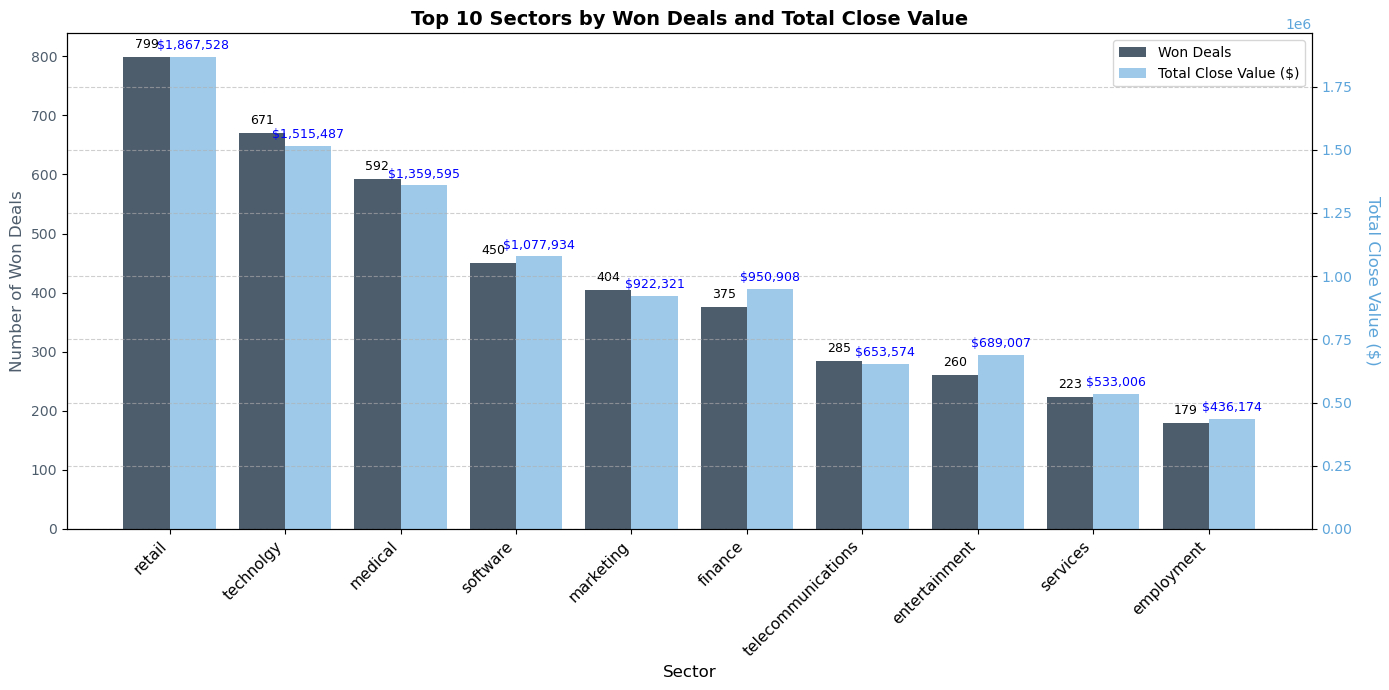

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Top 10 sectors
top_sectors = sector_stats.head(10).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Colors ---
won_color = '#4E5D6C'      # Dark Slate Gray
value_color = '#5DA5DA'    # Light Steel Blue

x = np.arange(len(top_sectors))

# --- Bar Plot: Won Deals ---
bars1 = ax1.bar(x - 0.2, top_sectors['won_deals'], color=won_color, label='Won Deals', width=0.4)
ax1.set_ylabel('Number of Won Deals', color=won_color, fontsize=12)
ax1.tick_params(axis='y', labelcolor=won_color)
ax1.set_xticks(x)
ax1.set_xticklabels(top_sectors['sector'], rotation=45, ha='right', fontsize=11)
ax1.set_xlabel('Sector', fontsize=12)

# --- Bar Plot: Total Close Value on Secondary Axis ---
ax2 = ax1.twinx()
bars2 = ax2.bar(x + 0.2, top_sectors['total_close_value'], color=value_color, alpha=0.6,
                label='Total Close Value ($)', width=0.4)
ax2.set_ylabel('Total Close Value ($)', color=value_color, fontsize=12, rotation=270, labelpad=20)
ax2.tick_params(axis='y', labelcolor=value_color)

# --- Value Labels on Bars ---
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 0.01 * max(top_sectors['total_close_value']),
             f'${int(height):,}', ha='center', va='bottom', fontsize=9, color='blue')

# --- Combine Legends ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

# --- Title & Layout ---
plt.title('Top 10 Sectors by Won Deals and Total Close Value', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Top 10 Sectors by Won Deals and Total Close Value

The bar chart highlights the **top-performing sectors** based on the number of won deals and their total close value.

- **Retail** leads the ranking with **799 won deals** and a combined value of **1,867,528**, _making it the top sector in both volume and revenue_.
- **Technology** follows with **671 won deals**, totaling **1,515,487**.
- **Medical** ranks third with **592 deals** worth **1,359,595**.
- Other notable contributors include **Software**, **Marketing**, and **Finance**, each with total close values exceeding **900,000**.

Overall, the visualization shows that while several sectors generate significant revenue, **Retail and Technology** account for the largest share of successful deals, reflecting strong demand and consistent performance in those industries.ustries.ustries.

In [63]:
product_stats = salesPipe[salesPipe['deal_stage'] == 'Won'].groupby('product').agg({
    'deal_stage': 'count'
}).rename(columns={'deal_stage': 'won_deals'})

## Create `product_stats` DataFrame

This command filters the deals with a `"Won"` stage and groups them by `product`, 
counting how many won deals each product has. The result is stored in the `product_stats` DataFrame.

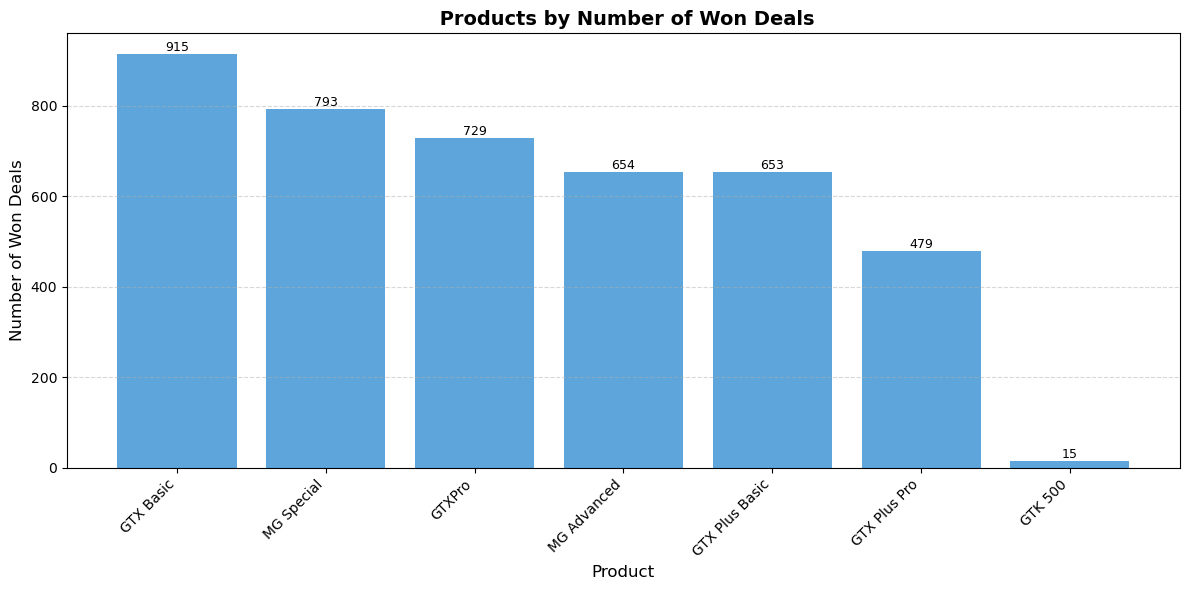

In [66]:
import matplotlib.pyplot as plt
top_products = product_stats.sort_values(by='won_deals', ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_products['product'], top_products['won_deals'], color='#5DA5DA')

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Styling
plt.xlabel('Product', fontsize=12)
plt.ylabel('Number of Won Deals', fontsize=12)
plt.title(' Products by Number of Won Deals', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##  Products by Number of Won Deals

This bar chart shows the top products based on the number of won deals.  
**GTX Basic** leads with the highest count, followed by **MG Special** and **GTXPro**.

The chart helps visualize which products are performing best in terms of closed (won) deals.

C:\Users\chahd\AppData\Local\Temp\ipykernel_3392\1383086766.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_products['product'], rotation=45, ha='right', fontsize=11)


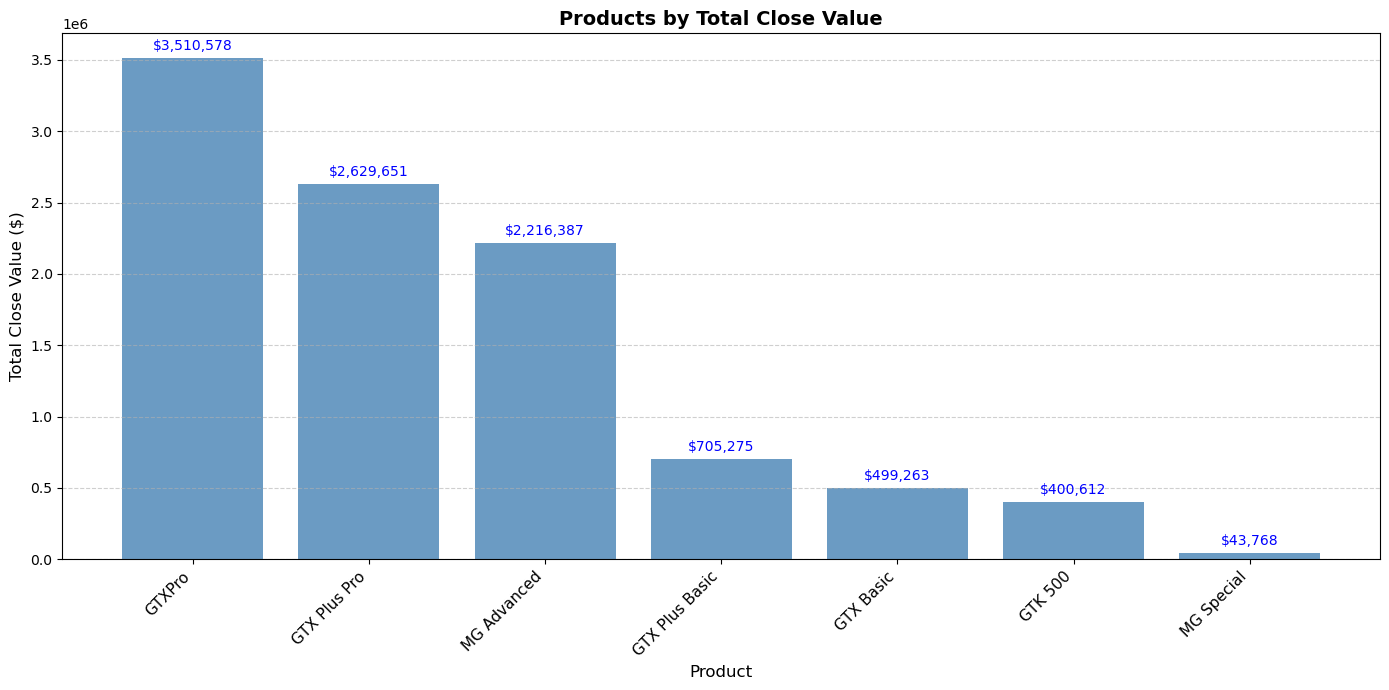

In [69]:
import matplotlib.pyplot as plt

# Sum close_value for won deals by product
won_product_value = salesPipe[salesPipe['deal_stage'] == 'Won'].groupby('product').agg({
    'close_value': 'sum'
}).rename(columns={'close_value': 'total_won_value'})

import matplotlib.pyplot as plt

# Sum close_value by product (all won deals)
product_value = salesPipe[salesPipe['deal_stage'] == 'Won'].groupby('product').agg({
    'close_value': 'sum'
}).rename(columns={'close_value': 'total_close_value'})

# Top 10 products by total close value
top_products = product_value.sort_values(by='total_close_value', ascending=False).head(10).reset_index()

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

# --- Color ---


bars = ax.bar(top_products['product'], top_products['total_close_value'], color='steelblue', alpha=0.8)

# --- Value Labels on Bars ---
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01*max(top_products['total_close_value']),
            f'${int(height):,}', ha='center', va='bottom', fontsize=10, color='blue')

# --- Styling ---
ax.set_xlabel('Product', fontsize=12)
ax.set_ylabel('Total Close Value ($)', fontsize=12)
ax.set_title('Products by Total Close Value', fontsize=14, fontweight='bold')
ax.set_xticklabels(top_products['product'], rotation=45, ha='right', fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Top 10 Products by Total Close Value

This bar chart displays the top 10 products ranked by their **total close value** from won deals.

**GTXPro**, **GTX Plus Pro**, and **MG Advanced** generated the highest revenue, indicating strong sales performance in terms of deal value.

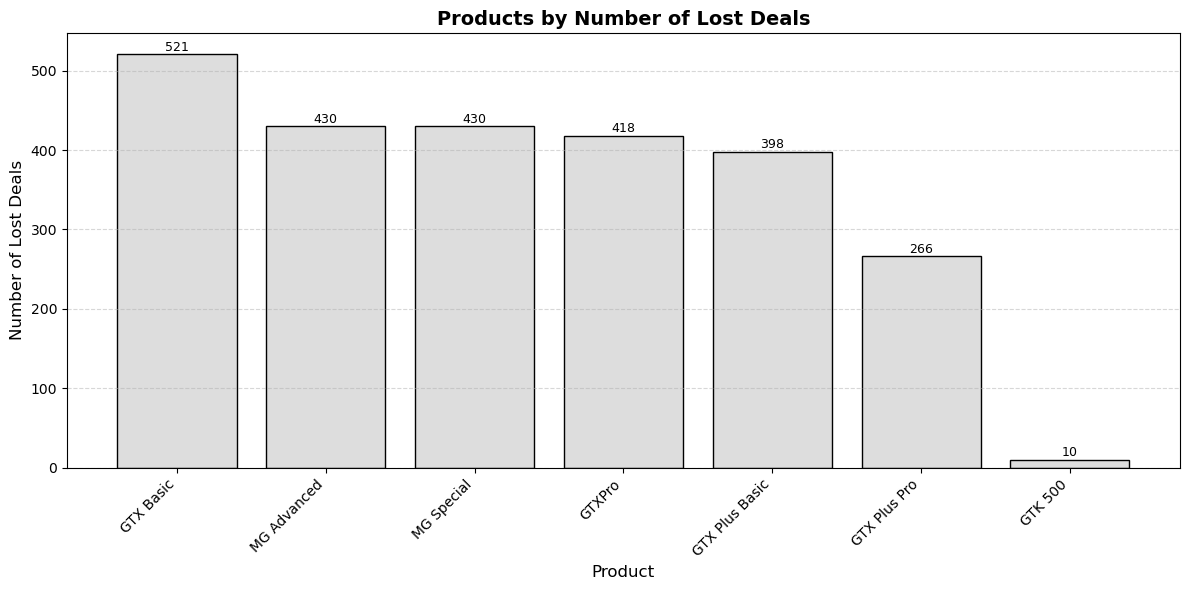

In [72]:
import matplotlib.pyplot as plt

# Aggregate lost deals by product
lost_product_stats = salesPipe[salesPipe['deal_stage'] == 'Lost'].groupby('product').agg({
    'deal_stage': 'count'
}).rename(columns={'deal_stage': 'lost_deals'})

# Get top 10 products by lost deals
top_lost_products = lost_product_stats.sort_values(by='lost_deals', ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_lost_products['product'], top_lost_products['lost_deals'], color='#dddddd',edgecolor='black')  # red-ish color for lost deals

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Styling
plt.xlabel('Product', fontsize=12)
plt.ylabel('Number of Lost Deals', fontsize=12)
plt.title('Products by Number of Lost Deals', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Products by Number of Lost Deals

This chart highlights the products with the highest number of **lost deals**.

- **GTX Basic** has the most lost deals (521), despite being the top product in terms of won deals. This suggests a high deal volume but also high volatility or inconsistency in closing.
- **MG Special** and **MG Advanced** also appear high on both the won and lost charts, indicating a mixed performance.
- In contrast, **GTXPro**, **GTX Plus Pro** show a more stable trend:
  - They generate **high revenue** (as seen in the total close value chart),
  - While maintaining a **lower number of lost deals**.

These products demonstrate stronger sales efficiency, converting more deals with fewer losses.

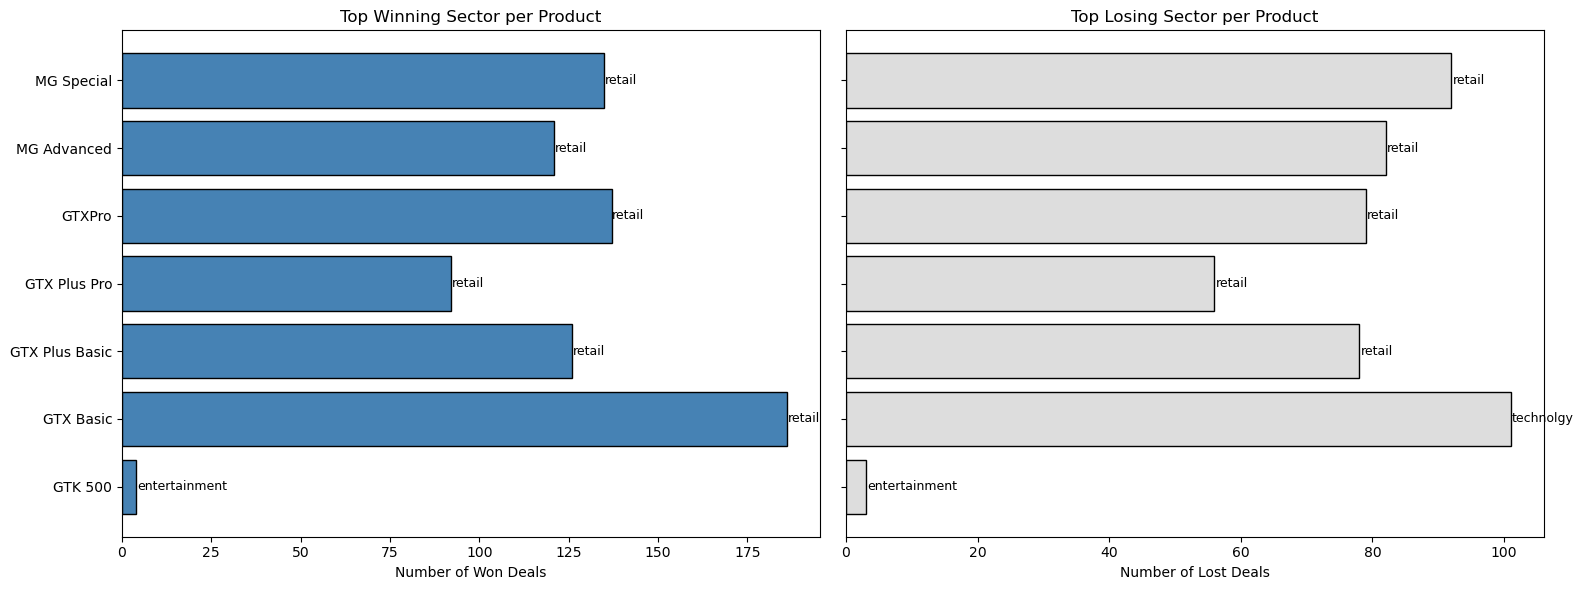

In [136]:
# Number of won deals by product for each sector
won_deals_P = merged_accounts[merged_accounts['deal_stage'] == 'Won'].groupby(['sector', 'product']).size().reset_index(name='won_deals')

# Number of lost deals by product for each sector
lost_deals_P = merged_accounts[merged_accounts['deal_stage'] == 'Lost'].groupby(['sector', 'product']).size().reset_index(name='lost_deals')

# Merge them for a complete view
deals_summary = pd.merge(won_deals_P, lost_deals_P, on=['sector', 'product'], how='outer').fillna(0)


top_wins = won_deals_P.loc[won_deals_P.groupby('product')['won_deals'].idxmax()]
top_wins = top_wins.rename(columns={'sector': 'top_win_sector', 'won_deals': 'max_wins'})

# For each product, get the sector with max lost deals
top_losses = lost_deals_P.loc[lost_deals_P.groupby('product')['lost_deals'].idxmax()]
top_losses = top_losses.rename(columns={'sector': 'top_loss_sector', 'lost_deals': 'max_losses'})

# Merge into one summary table
summary = pd.merge(top_wins[['product','top_win_sector','max_wins']],
                   top_losses[['product','top_loss_sector','max_losses']],
                   on='product', how='outer')


# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# Plot top winning sector per product
axes[0].barh(summary['product'], summary['max_wins'], color="steelblue",edgecolor="black")
for i, val in enumerate(summary['top_win_sector']):
    axes[0].text(summary['max_wins'].iloc[i]+0.2, i, val, va='center', fontsize=9)
axes[0].set_title("Top Winning Sector per Product")
axes[0].set_xlabel("Number of Won Deals")

# Plot top losing sector per product
axes[1].barh(summary['product'], summary['max_losses'], color='#dddddd',edgecolor="black")
for i, val in enumerate(summary['top_loss_sector']):
    axes[1].text(summary['max_losses'].iloc[i]+0.2, i, val, va='center', fontsize=9)
axes[1].set_title("Top Losing Sector per Product")
axes[1].set_xlabel("Number of Lost Deals")

plt.tight_layout()
plt.show()

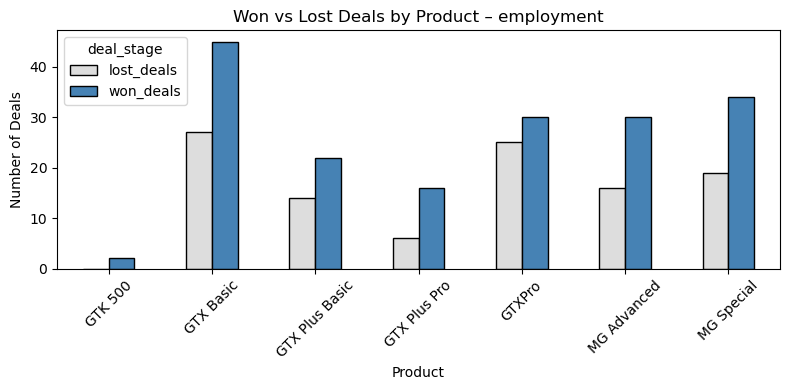

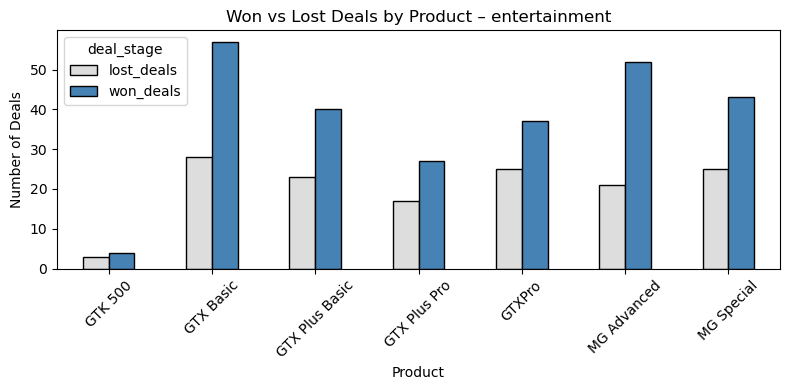

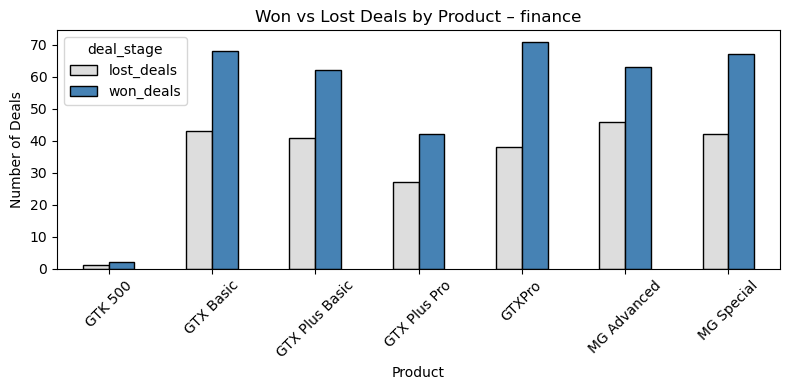

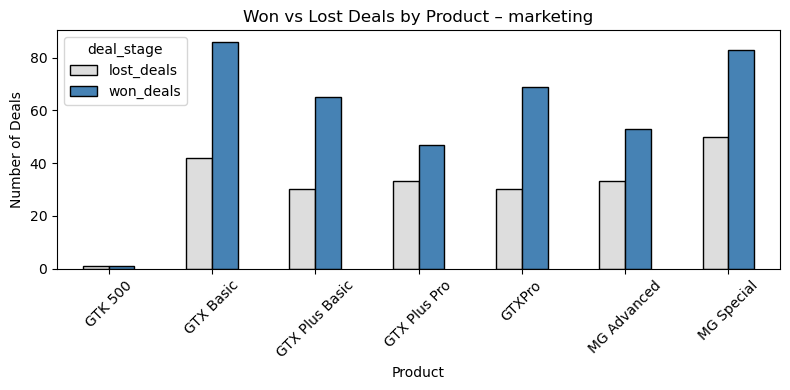

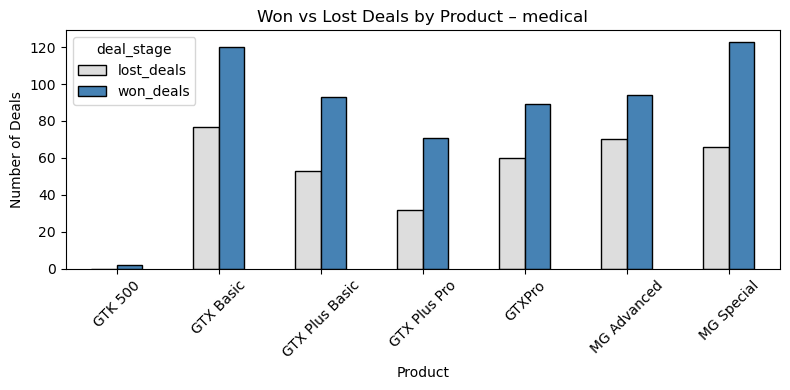

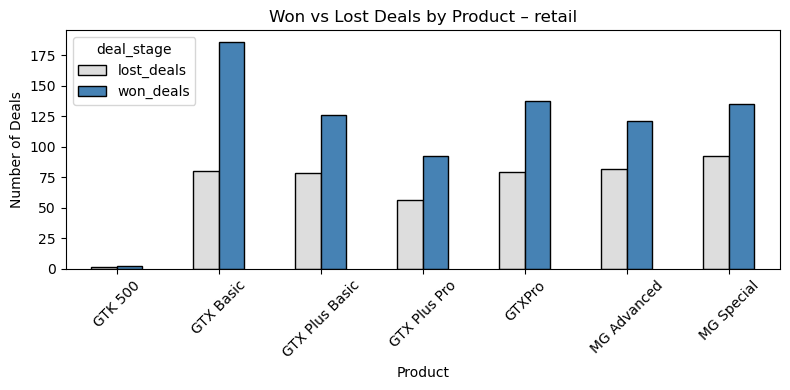

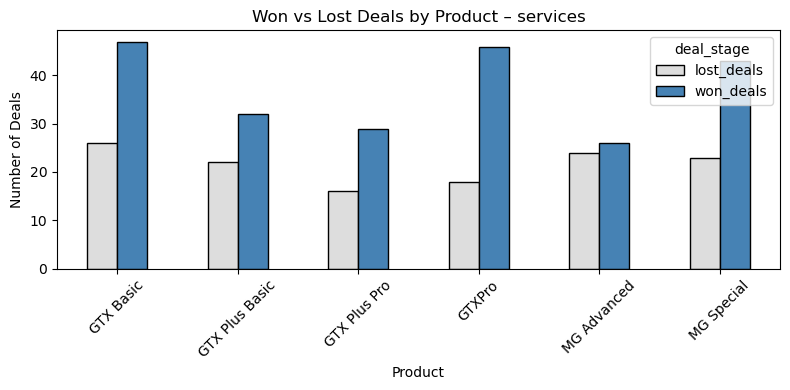

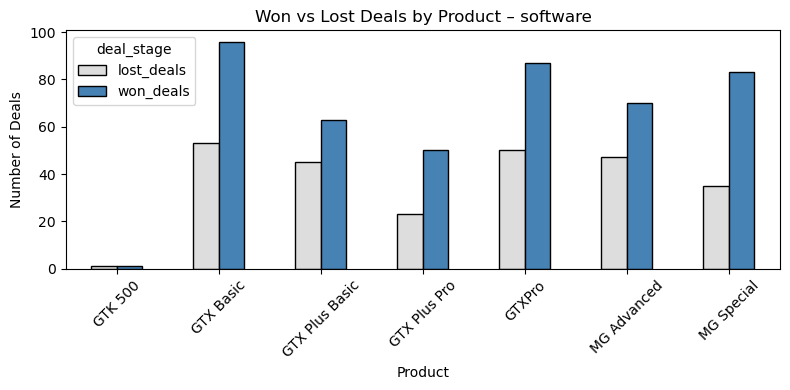

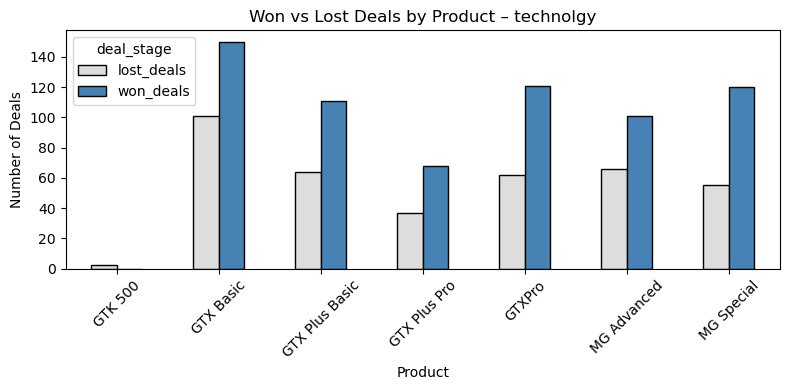

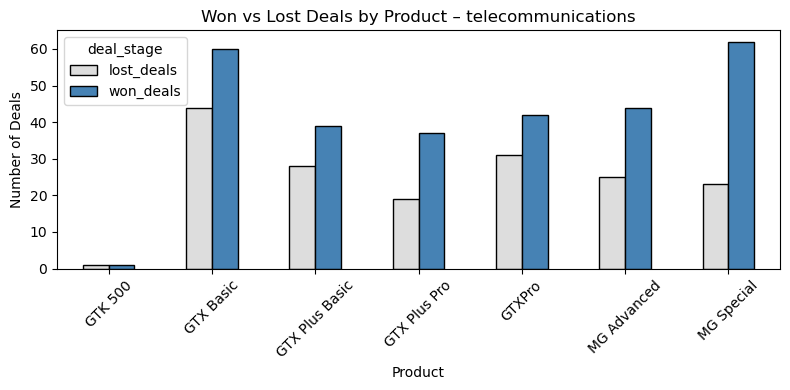

In [132]:
plot_data = deals_summary.melt(id_vars=['sector','product'], value_vars=['won_deals','lost_deals'], var_name='deal_stage', value_name='count') 
for sector in plot_data['sector'].unique(): 
    sector_data = plot_data[plot_data['sector'] == sector] 
    pivoted = sector_data.pivot(index='product', columns='deal_stage', values='count').fillna(0) 
    pivoted.plot(kind='bar', figsize=(8,4), color=['#dddddd','steelblue'],edgecolor="black")
    plt.title(f"Won vs Lost Deals by Product – {sector}") 
    plt.xlabel("Product") 
    plt.ylabel("Number of Deals")
    plt.xticks(rotation=45) 
    plt.tight_layout() 
    plt.show()

In [75]:
import pandas as pd

# Create a copy to avoid modifying original dataset
salesPipe_dt = salesPipe.copy()

# Convert close_date using explicit month/day/year format
salesPipe_dt['close_date'] = pd.to_datetime(
    salesPipe_dt['close_date'],
    format='%Y-%m-%d', 
    errors='coerce'     # invalid dates become NaT
)

# Create a new dataset with only valid dates
salesPipe_no_null = salesPipe_dt[salesPipe_dt['close_date'].notna()].copy()

# Extract year and month from the correctly parsed close_date
salesPipe_no_null['year'] = salesPipe_no_null['close_date'].dt.year
salesPipe_no_null['month'] = salesPipe_no_null['close_date'].dt.month

# Check the first rows
print(salesPipe_no_null[['close_date', 'year', 'month']])

     close_date  year  month
0    2017-03-01  2017      3
1    2017-03-11  2017      3
2    2017-03-07  2017      3
3    2017-03-09  2017      3
4    2017-03-02  2017      3
...         ...   ...    ...
8295 2017-12-26  2017     12
8296 2017-12-30  2017     12
8297 2017-12-29  2017     12
8298 2017-12-30  2017     12
8299 2017-12-29  2017     12

[6711 rows x 3 columns]


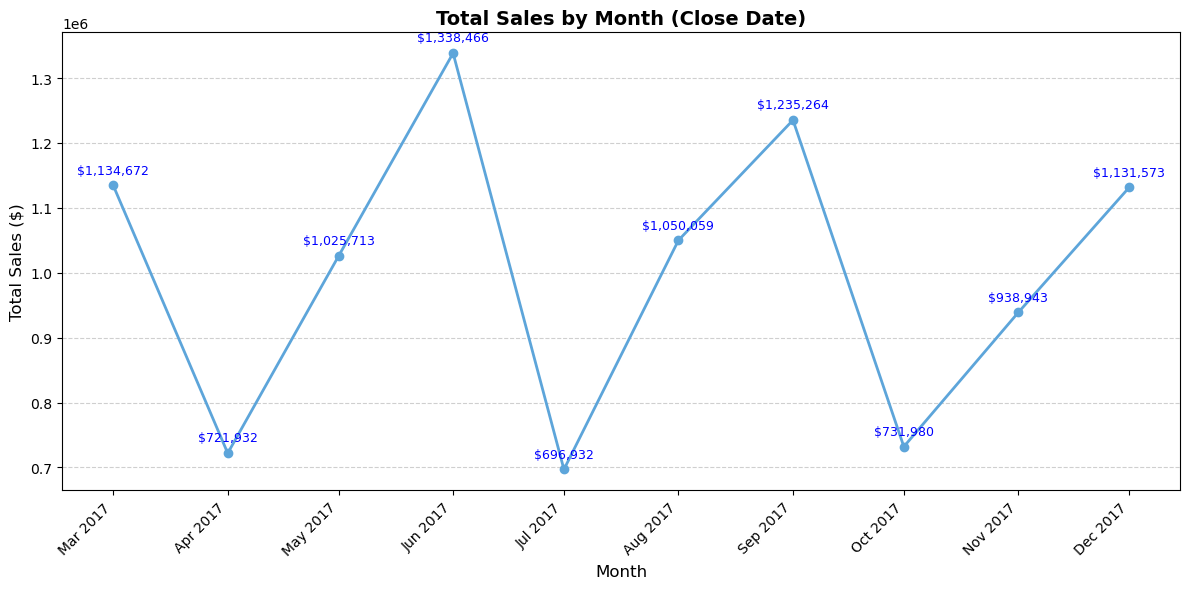

In [79]:
monthly_sales = salesPipe_no_null.groupby(['year', 'month'])['close_value'].sum().reset_index()

monthly_sales['month_start'] = pd.to_datetime(dict(
    year=monthly_sales['year'],
    month=monthly_sales['month'],
    day=1
))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_sales['month_start'], monthly_sales['close_value'], marker='o', color='#5DA5DA', linewidth=2)

# Titles & labels
ax.set_title("Total Sales by Month (Close Date)", fontsize=14, fontweight='bold')
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Total Sales ($)", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Format x-axis
ax.set_xticks(monthly_sales['month_start'])
ax.set_xticklabels([d.strftime('%b %Y') for d in monthly_sales['month_start']], rotation=45, ha='right')

# Add value labels above each point
for x, y in zip(monthly_sales['month_start'], monthly_sales['close_value']):
    ax.text(x, y + 0.01*max(monthly_sales['close_value']), f'${int(y):,}', ha='center', va='bottom', fontsize=9, color='blue')

plt.tight_layout()
plt.show()

### Monthly Sales Trend (Close Date)

The line chart shows that **sales are not stable**, fluctuating significantly from month to month.  
The total `close_value` rises and falls frequently, reflecting variability in deal closures.  
Sales reached a **peak** in **June 2017**, with **$1,338,466**, after which the trend decreased before rising again in subsequent month
s.

# <span style="color:steelblue">Final Conclusions</span>

Based on the CRM data analysis, several strategic insights can guide future actions:  

- **Industry Focus:** Sales efforts should target companies in the **retail, technology, software, and medical fields**, which show the highest potential for revenue growth.  
- **Product Portfolio Optimization:** Consider removing **GTX 500** due to very low number of deals and minimal revenue contribution.  
- **Product Strategy:** Focus more on products with **stable sales trends** to ensure consistent performance and stronger revenue generation.  
- **Sector Targeting:** Avoid directing sales of products to sectors where they have a **high number of lost deals**, and instead focus on sectors where they consistently win deals.  

Overall, these actions can help improve win rates, optimize the product portfolio, and strengthen overall revenue contribution.e contribribution.ribution.tion. 